In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as py
import matplotlib.pyplot as plot
import seaborn as sns
from matplotlib import rc

import matplotlib.mlab as mlab

In [2]:
dfMain = pd.read_csv('main.csv', low_memory=False);
#Loads 'main.csv'

In [3]:
dfMain= dfMain.filter(['mainid','brgy','water','water_dist','fsmonth_1','fsdays_1','fsmonth_2','fsdays_2']);
# Filters the dataframe to show only the relevant columns for scoring water accessibility

# dfFood = dfMain.filter(['mainid','brgy','fshort','fsdays_1','fsdays_2']);
# Filters the dataframe to show only the relevant columns for scoring food security
# We will use dfFood later

dfMain

,mainid,brgy,water,water_dist,fsmonth_1,fsdays_1,fsmonth_2,fsdays_2
0,1061066,186,1,0,NaN,0,NaN,0
1,555683,69,2,10,NaN,0,NaN,0
2,8611889,1,1,0,NaN,0,NaN,0
3,299398,165,2,5,NaN,0,NaN,0
4,136921,135,2,2,NaN,0,NaN,0
5,3842267,43,10,0,NaN,0,NaN,0
6,899855,201,1,0,NaN,0,NaN,0
7,235953,190,11,0,NaN,0,NaN,0
8,1591438,47,11,0,NaN,0,NaN,0
9,1053432,130,11,0,NaN,0,NaN,0


In [4]:
# The types of water sources are
# 1 Community water system-own
# 2 Community water system-shared
# 3 Deep well-own
# 4 Deep well-shared
# 5 Artesian well-own
# 6 Artesian well-shared
# 7 Dug/shallow well-own
# 8 Dug/shallow well-shared
# 9 River, stream, lake, spring, bodies of water
# 10 Bottled water
# 11 Tanker truck/Peddler
# 12 Other

# We based water security on the type of water supply source the family maintains.
# Our assumption is that family-owned water sources are more reliable than shared water sources because only they will be likely to have easy access to it.
# Based on that assumption, we'll create a new variable called water_own which is True (1) if the water source is owned by the family.
# Owned water sources are 1, 3, 5, 7, 10

dfMain['water_own'] = py.nan

for i, row in dfMain.iterrows():
    x = row['water']
    if (x == 1 or x == 3 or x == 5 or x == 7 or x == 10) :
        dfMain.at[i,'water_own']=1
    else:
        dfMain.at[i,'water_own']=0
    
dfMain

,mainid,brgy,water,water_dist,fsmonth_1,fsdays_1,fsmonth_2,fsdays_2,water_own
0,1061066,186,1,0,NaN,0,NaN,0,1.0
1,555683,69,2,10,NaN,0,NaN,0,0.0
2,8611889,1,1,0,NaN,0,NaN,0,1.0
3,299398,165,2,5,NaN,0,NaN,0,0.0
4,136921,135,2,2,NaN,0,NaN,0,0.0
5,3842267,43,10,0,NaN,0,NaN,0,1.0
6,899855,201,1,0,NaN,0,NaN,0,1.0
7,235953,190,11,0,NaN,0,NaN,0,0.0
8,1591438,47,11,0,NaN,0,NaN,0,0.0
9,1053432,130,11,0,NaN,0,NaN,0,0.0


In [5]:
dfMain['water_score'] = py.nan

for i, row in dfMain.iterrows():
    x = row['water_dist']
    z = row['water_own']
    if (x >= 0 and x < 6) :
        dfMain.at[i,'water_score']=1.0 * z
    elif (x > 5 and x < 251):
        dfMain.at[i,'water_score']= (1.0 - ((x - 5.0) / 246 )) * z
    elif (x > 250): 
        dfMain.at[i,'water_score']= 0.0
        
# Of course, all non-owned water sources automatically results to ZERO score thus the 'z' multiplier
# 1st conditional: Water source distance of 0 to 5 meters gets perfect score 1.
# 2nd conditional: Water source distance of 6 to 250 meters gets scored using a formula we made.
# There are 246 meters in between 5 and 251 thus the denominator of 246.
# 5 is subtracted from distance X because were counting distances after 5 meters.
# The quotient of (distance X minus 5) over 246 gets subtracted from the perfect score 1.

dfMain

,mainid,brgy,water,water_dist,fsmonth_1,fsdays_1,fsmonth_2,fsdays_2,water_own,water_score
0,1061066,186,1,0,NaN,0,NaN,0,1.0,1.0
1,555683,69,2,10,NaN,0,NaN,0,0.0,0.0
2,8611889,1,1,0,NaN,0,NaN,0,1.0,1.0
3,299398,165,2,5,NaN,0,NaN,0,0.0,0.0
4,136921,135,2,2,NaN,0,NaN,0,0.0,0.0
5,3842267,43,10,0,NaN,0,NaN,0,1.0,1.0
6,899855,201,1,0,NaN,0,NaN,0,1.0,1.0
7,235953,190,11,0,NaN,0,NaN,0,0.0,0.0
8,1591438,47,11,0,NaN,0,NaN,0,0.0,0.0
9,1053432,130,11,0,NaN,0,NaN,0,0.0,0.0


In [6]:
dfMain.water_score.unique()
# Checking if the formulas produced unique scores.

array([1.        , 0.        , 0.95934959, 0.89837398, 0.93902439,
       0.9796748 , 0.99593496, 0.20731707, 0.99186992, 0.81707317,
       0.98780488])

In [7]:
dfMain = dfMain.drop(columns=['water','water_dist','water_own'])
# Dropping columns we don't have use for anymore.
# We only need the water scores and the food related data from this point.


In [8]:
arrayWaterScores = dfMain.groupby('brgy')['water_score'].mean()
# Groups the families by brgy and takes the average of their water score.
# Output is an array, not a dataframe.

arrayWaterScores

brgy
1      1.000000
2      0.036697
3      0.285714
4      0.440758
5      0.089431
6      0.173469
7      0.274419
8      0.185484
9      0.251852
10     0.124183
11     0.045802
12     0.395939
13     0.066317
14     0.195918
15     0.007812
16     0.037879
17     0.500000
18     0.252788
19     0.301370
20     0.357692
21     0.875969
22     0.800000
23     0.502732
24     0.101399
25     0.013333
26     0.063953
27     0.046296
28     0.018779
29     1.000000
30     0.511236
         ...   
172    0.770175
173    0.264151
174    0.127371
175    0.227991
176    1.000000
177    0.521236
178    0.545295
179    0.973865
180    0.495450
181    0.464419
182    0.257935
183    0.086811
184    0.808229
185    0.287634
186    0.962038
187    0.970803
188    0.241779
189    0.228407
190    0.321713
191    0.366801
192    0.236550
193    0.289123
194    0.392385
195    0.298951
196    0.792517
197    0.247679
198    0.158019
199    0.319192
200    0.051370
201    0.779070
Name: water_score, 

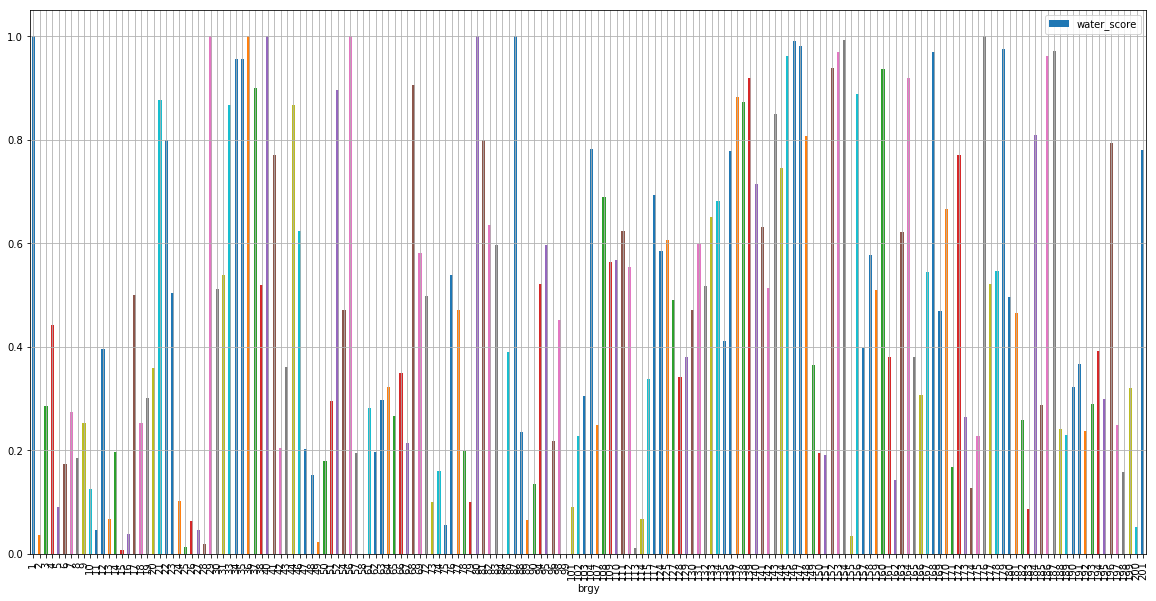

In [9]:
arrayWaterScores.plot(figsize=(20, 10), kind='bar', grid=True, align='center', width=0.5, stacked=True)
plot.legend()
plot.show()

# Calamity Prep Score 3A

Explain later

In [10]:
dfMain

,mainid,brgy,fsmonth_1,fsdays_1,fsmonth_2,fsdays_2,water_score
0,1061066,186,NaN,0,NaN,0,1.0
1,555683,69,NaN,0,NaN,0,0.0
2,8611889,1,NaN,0,NaN,0,1.0
3,299398,165,NaN,0,NaN,0,0.0
4,136921,135,NaN,0,NaN,0,0.0
5,3842267,43,NaN,0,NaN,0,1.0
6,899855,201,NaN,0,NaN,0,1.0
7,235953,190,NaN,0,NaN,0,0.0
8,1591438,47,NaN,0,NaN,0,0.0
9,1053432,130,NaN,0,NaN,0,0.0


In [11]:
dfMain['fsmonth_1'].fillna(0, inplace=True)
dfMain['fsmonth_2'].fillna(0, inplace=True)
dfMain

,mainid,brgy,fsmonth_1,fsdays_1,fsmonth_2,fsdays_2,water_score
0,1061066,186,0.0,0,0.0,0,1.0
1,555683,69,0.0,0,0.0,0,0.0
2,8611889,1,0.0,0,0.0,0,1.0
3,299398,165,0.0,0,0.0,0,0.0
4,136921,135,0.0,0,0.0,0,0.0
5,3842267,43,0.0,0,0.0,0,1.0
6,899855,201,0.0,0,0.0,0,1.0
7,235953,190,0.0,0,0.0,0,0.0
8,1591438,47,0.0,0,0.0,0,0.0
9,1053432,130,0.0,0,0.0,0,0.0


In [12]:
dfMain.fsmonth_1.unique()

array([ 0.,  7.,  4.,  2.,  5.,  3.,  6.,  9.,  1.,  8., 10.])

In [19]:
# According to an article July, August, and September are when typhoons strike the PH the most.
# August is when the frequency of typhoons peak. There is no specific distribution data so we just assumed that 


# https://www.businessinsider.com/how-many-days-can-you-survive-without-water-2014-5
# People can last without food for 21 days

# http://bagong.pagasa.dost.gov.ph/climate/tropical-cyclone-information
# According to PAGASA, storms are most prevalent in August with up to 4 typhoons occcuring.
# Up to 3 for September and October, up to 2 in November and December
# Up to 1 for January and very unlikely in February.
# Assuming a normal distribution with August values at the peak, we assumed that the values for March to 
# July will mimic the typhoon frequency of August to January but in reverse order.
# Using this, we created a 'month coefficient' scheme which assigns a multiplier to a month based on the 
# frequency of typhoons occuring therein.
# The coefficient is computed by dividing the month's typhoon frequency by that of august.

for i, row in dfMain.iterrows():
    x = row['fsmonth_1']
    if (x == 2):
        dfMain.at[i,'month_c1']= 0
    elif (x == 1 or x == 3) :
        dfMain.at[i,'month_c1']= 1 / 4
    elif (x == 4 or x == 5 or x == 11 or x == 12):
        dfMain.at[i,'month_c1']= 2 / 4
    elif (x == 6 or x == 7 or x == 9 or x == 10):
        dfMain.at[i,'month_c1']= 3 / 4
    elif (x == 8):
        dfMain.at[i,'month_c1']= 4 / 4
    else:
        dfMain.at[i,'month_c1']= 0
        
# The code above creates a month_c1 or month coefficient value 1 in each row corresponding to that rows fsmonth_1 month
        
    x = row['fsmonth_2']
    if (x == 2):
        dfMain.at[i,'month_c2']= 0
    elif (x == 1 or x == 3) :
        dfMain.at[i,'month_c2']= 1 / 4
    elif (x == 4 or x == 5 or x == 11 or x == 12):
        dfMain.at[i,'month_c2']= 2 / 4
    elif (x == 6 or x == 7 or x == 9 or x == 10):
        dfMain.at[i,'month_c2']= 3 / 4
    elif (x == 8):
        dfMain.at[i,'month_c2']= 4 / 4
    else:
        dfMain.at[i,'month_c2']= 0
        
# The code above does the same thing but with fsmonth_2 month

In [20]:
dfMain

,mainid,brgy,fsmonth_1,fsdays_1,fsmonth_2,fsdays_2,water_score,month_c,month_c1,month_c2
0,1061066,186,0.0,0,0.0,0,1.0,NaN,0.0,0.0
1,555683,69,0.0,0,0.0,0,0.0,NaN,0.0,0.0
2,8611889,1,0.0,0,0.0,0,1.0,NaN,0.0,0.0
3,299398,165,0.0,0,0.0,0,0.0,NaN,0.0,0.0
4,136921,135,0.0,0,0.0,0,0.0,NaN,0.0,0.0
5,3842267,43,0.0,0,0.0,0,1.0,NaN,0.0,0.0
6,899855,201,0.0,0,0.0,0,1.0,NaN,0.0,0.0
7,235953,190,0.0,0,0.0,0,0.0,NaN,0.0,0.0
8,1591438,47,0.0,0,0.0,0,0.0,NaN,0.0,0.0
9,1053432,130,0.0,0,0.0,0,0.0,NaN,0.0,0.0


In [22]:
dfMain['shortage_severity1'] = dfMain['fsdays_1'] * dfMain['month_c1'] / 21
dfMain['shortage_severity2'] = dfMain['fsdays_2'] * dfMain['month_c2'] / 21

# EXPLAIN LATER 

dfMain

,mainid,brgy,fsmonth_1,fsdays_1,fsmonth_2,fsdays_2,water_score,month_c,month_c1,month_c2,shortage_severity1,shortage_severity2
0,1061066,186,0.0,0,0.0,0,1.0,NaN,0.0,0.0,0.0,0.0
1,555683,69,0.0,0,0.0,0,0.0,NaN,0.0,0.0,0.0,0.0
2,8611889,1,0.0,0,0.0,0,1.0,NaN,0.0,0.0,0.0,0.0
3,299398,165,0.0,0,0.0,0,0.0,NaN,0.0,0.0,0.0,0.0
4,136921,135,0.0,0,0.0,0,0.0,NaN,0.0,0.0,0.0,0.0
5,3842267,43,0.0,0,0.0,0,1.0,NaN,0.0,0.0,0.0,0.0
6,899855,201,0.0,0,0.0,0,1.0,NaN,0.0,0.0,0.0,0.0
7,235953,190,0.0,0,0.0,0,0.0,NaN,0.0,0.0,0.0,0.0
8,1591438,47,0.0,0,0.0,0,0.0,NaN,0.0,0.0,0.0,0.0
9,1053432,130,0.0,0,0.0,0,0.0,NaN,0.0,0.0,0.0,0.0


In [23]:
dfMain.shortage_severity1.unique()

array([0.        , 0.17857143, 0.07142857, 0.02380952, 0.04761905,
       1.07142857, 0.71428571, 0.03571429, 0.35714286, 0.10714286,
       0.08333333, 0.0952381 , 0.25      , 0.14285714])

In [25]:
dfMain.fsdays_1.unique()

array([ 0,  5,  3,  1,  2, 30, 20,  4,  7], dtype=int64)